In [1]:
import os
import tweepy as tw
import pandas as pd
tw_key = 'ZMWOLani1'
tw_secret = 'CrJ061eydj'
tw_access_token = '149'
tw_access_token_secret = '97mH7'
auth = tw.OAuthHandler(tw_key, tw_secret)
auth.set_access_token(tw_access_token, tw_access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)
search_words = "Ministry of Truth"

In [2]:
tweets = tw.Cursor(api.search, q=search_words, lang="en").items(1000)
MOTTweets = [[tweet.id,tweet.user.screen_name, tweet.user.verified, tweet.text, tweet.place, tweet.user.location, tweet.source,tweet.created_at,tweet.retweet_count,tweet.favorite_count] 
             for tweet in tweets]
MOTTweetsdf = pd.DataFrame(data=MOTTweets, columns=['id','user',"verified","text","source","place","TweetSource","created_at","retweetCount","Likes"])

   Sources  counts
0    False     991
1     True       9


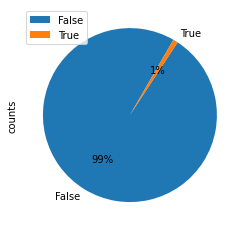

In [5]:
MOTdf_counts_verified = MOTTweetsdf['verified'].value_counts(dropna=True,sort=True)
MOTdf_value_counts_verified = MOTdf_counts_verified.reset_index()
MOTdf_value_counts_verified.columns = ['Sources', 'counts'] # change column names
MOTdf_value_counts_verified.drop(MOTdf_value_counts_verified[MOTdf_value_counts_verified['Sources'] == "verified"].index, inplace = True)
print(MOTdf_value_counts_verified)
MOTdf_value_counts_verified.groupby(['Sources']).sum().plot(kind='pie', y='counts', autopct='%1.0f%%', startangle=60)